In [1]:
import pandas as pd
import pub_utils as pu

# Path to your data file - adjust as needed
DATA_PATH = '../data/RipollSanchez2023/neuroanatomy.csv'
OUTPUT_PATH = '../connectomes/neuron_features.csv'

# Create the NeuronFeatures object
df = pd.read_csv(DATA_PATH)

# Reorder rows to match AllHermNeurons order
df = df.set_index('neuronID').loc[pu.AllHermNeurons].reset_index()
nf = pu.NeuronFeatures(df)
print(nf.summary())

# Save to CSV
nf.to_dataframe().to_csv(OUTPUT_PATH)
print(f"Saved to {OUTPUT_PATH}")

NeuronFeatures Summary
Total neuron classes: 302
Total features: 49

Feature breakdown by category:
  cellType: 5 features
  sensoryType: 12 features
  segment: 3 features
  process: 29 features
Saved to ../connectomes/neuron_features.csv


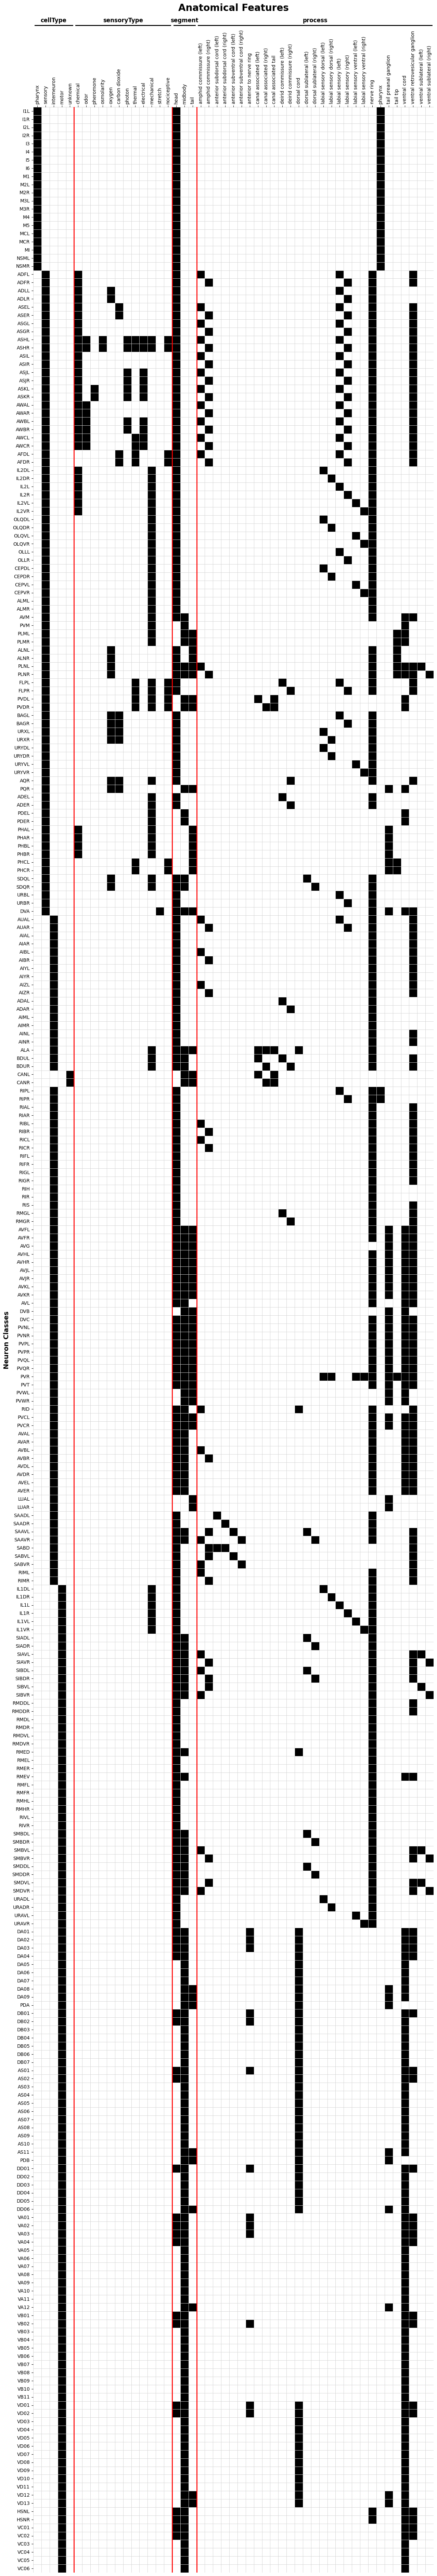

Total neuron classes: 302
Total features: 49
Feature breakdown: cellType=5, sensoryType=12, segment=3, process=29


In [ ]:
# Load NeuronFeatures from CSV
CSV_PATH = '../connectomes/neuron_features.csv'
OUTPUT_PATH = '../connectomes/neuron_features.png'

nf = pu.NeuronFeatures(pd.read_csv(CSV_PATH))

# Generate the plot
pu.plot_neuron_features(nf, OUTPUT_PATH)